# TASK 2.2: Tracking with a Kalman Filter

In [5]:
from __future__ import print_function
from skimage import io
from sort import Sort
from IPython import display as dp
import matplotlib.pyplot as plt  
import matplotlib.patches as patches
import numpy as np
import pandas as pd
import pickle as pkl
import os
import time
import cv2
plt.style.use("default")
%matplotlib inline

First we load all the data

In [6]:
# Detection to DataFrame
def get_detection_dataframe(detections):
    bboxes = []
    bsizes = []
    bdetections = []
    tracks = list(range(0, len(detections)))
    
    colours = []
    for i in range(len(detections)):
        colours.append(tuple(np.random.choice(range(256), size=3).astype('int')))
    
    for detection in detections:
        bbox = np.array(detection.getBBox()).astype('int')
        bboxes.append(bbox)

        bsize = int(detection.areaOfRec())
        bsizes.append(bsize)

        bdetections.append(detection)

    detec = {
        'track': tracks,
        'detection': bdetections,
        'bbox': bboxes,
        'size': bsizes,
        'colour': colours,
    }
    detections_pd = pd.DataFrame(detec)
    detections_pd = detections_pd.sort_values(by=['size'], ascending=False)
    detections_pd = detections_pd.reset_index(drop=True)
    
    return detections_pd

In [7]:
# Load paths
file_path = 'detection_pkls/retinanet_101_detections.pkl'
data_path = '../datasets/AICity_data/train/S03/c010/'
video_path = '../datasets/AICity_data/train/S03/c010/vdo.avi'

# Load detections
with open(file_path , 'rb') as f:
    all_detections = pkl.load(f)


get_detection_dataframe(all_detections[str(0)]).sort_values("track")

,track,detection,bbox,size,colour
0,0,"Frame 0, TL [1284.8372802734375,362.1326904296...","[1284, 362, 1520, 539]",41907,"(27, 215, 82)"
2,1,"Frame 0, TL [564.6638793945312,96.273307800292...","[564, 96, 658, 168]",6779,"(78, 220, 117)"
4,2,"Frame 0, TL [928.7540283203125,78.073799133300...","[928, 78, 1014, 145]",5791,"(93, 43, 237)"
11,3,"Frame 0, TL [885.072265625,94.19532012939453],...","[885, 94, 935, 141]",2404,"(128, 38, 129)"
13,4,"Frame 0, TL [908.677734375,92.77952575683594],...","[908, 92, 944, 141]",1736,"(141, 159, 10)"
9,5,"Frame 0, TL [579.739501953125,74.2380752563476...","[579, 74, 658, 110]",2870,"(240, 35, 100)"
1,6,"Frame 0, TL [542.8624877929688,68.340904235839...","[542, 68, 631, 159]",8089,"(227, 152, 146)"
14,7,"Frame 0, TL [874.1964721679688,99.487159729003...","[874, 99, 910, 142]",1533,"(170, 17, 44)"
6,8,"Frame 0, TL [895.2154541015625,88.084892272949...","[895, 88, 961, 141]",3582,"(206, 122, 108)"
7,9,"Frame 0, TL [1178.972412109375,103.75167846679...","[1178, 103, 1228, 164]",3049,"(103, 223, 242)"


Starting Tracking (AMAIA)

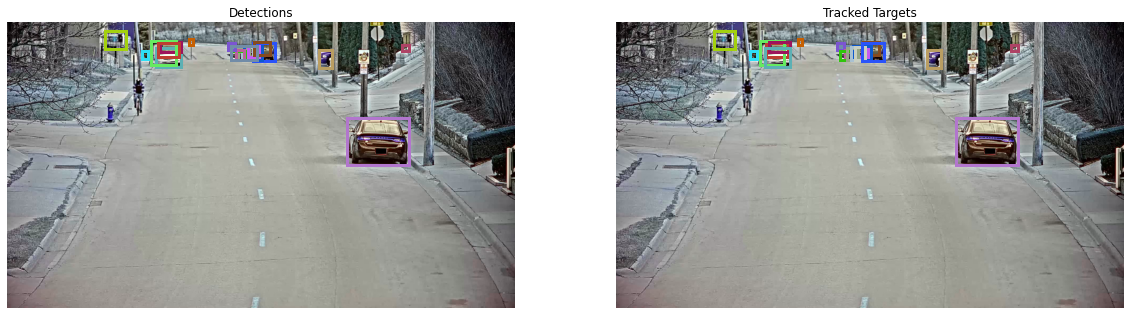

iou_matrix_shape: (21, 43)
m[0]: 0
m[1]: 1
---


ValueError: cannot reshape array of size 21 into shape (1,2)

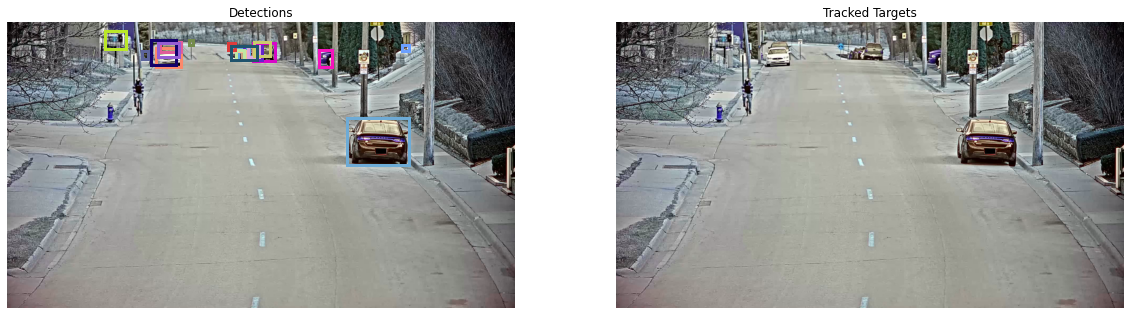

In [4]:
# Load video frames
vidcap = cv2.VideoCapture(video_path)
num_frames = int(vidcap.get(cv2.CAP_PROP_FRAME_COUNT))

# Iterate Frames
for frame in range(num_frames):
    dets = []
    colors = []

    _, im = vidcap.read() # Read frame
    detections = get_detection_dataframe(all_detections[str(frame)]).sort_values("track") # Load detections

    for (track_id, det, bbox, size, colour) in detections.itertuples(index=False): # Iter All Detections
        colour = [c/255 for c in colour] # Normalize colour values
        coords = (bbox[0], bbox[1]), bbox[2]-bbox[0], bbox[3]-bbox[1] # Format (lower_x, lower_y), width, height

In [ ]:
"""
# Load video frames
vidcap = cv2.VideoCapture(video_path)
num_frames = int(vidcap.get(cv2.CAP_PROP_FRAME_COUNT))

# Algorithm Params
display = True
total_time = 0.0
out = []

# Set Iterative Plot
if display:
    plt.ion() 
    fig, ax = plt.subplots(1, 2,figsize=(20,20))

# Kalman Sort Tracker
mot_tracker = Sort()

# Iterate Frames
for frame in range(num_frames):
    dets = []
    colors = []
    if display:
        _, im = vidcap.read() # Read frame
        detections = get_detection_dataframe(all_detections[str(frame)]).sort_values("track") # Load detections

        for (track_id, det, bbox, size, colour) in detections.itertuples(index=False): # Iter All Detections
            colour = [c/255 for c in colour] # Normalize colour values
            coords = (bbox[0], bbox[1]), bbox[2]-bbox[0], bbox[3]-bbox[1] # Format (lower_x, lower_y), width, height
            ax[0].add_patch(plt.Rectangle(*coords,fill=False,edgecolor=colour,lw=3)) # Draw bbox
            dets.append(np.array(bbox))
            colors.append(colour)

        ax[0].imshow(im)
        ax[0].axis('off')
        ax[0].set_title('Detections')

    if display:
        ax[1].imshow(im)
        ax[1].axis('off')
        ax[1].set_title('Tracked Targets')
    
    # Update sort tracer
    start_time = time.time()
    trackers = mot_tracker.update(np.array(dets))
    cycle_time = time.time() - start_time
    total_time += cycle_time
    # Save tracker
    out.append(trackers)

    for d in trackers:
        if display:
            d = d.astype(np.uint32)
            ax[1].add_patch(patches.Rectangle((d[0],d[1]),d[2]-d[0],d[3]-d[1],fill=False,lw=3,ec=colors[d[4] % len(colors)]))
            ax[1].set_adjustable('box')
    

    # Clear Display
    if display:
        dp.clear_output(wait=True)
        dp.display(plt.gcf())
        time.sleep(0.000001)
        ax[0].cla()
        ax[1].cla()
"""